In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
train = pd.read_csv("D:/TCSiON/demand-forecasting-kernels-only/train.csv")
test =  pd.read_csv("D:/TCSiON/demand-forecasting-kernels-only/test.csv")

In [3]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
test.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [7]:
print('Start date of forecasting : %s' % train['date'].min())
print('End date of forecasting: %s' % train['date'].max())

Start date of forecasting : 2013-01-01
End date of forecasting: 2017-12-31


In [11]:
import datetime
size = len(test['date'].unique())
print('Forecast size of train data: ', size)

Forecast size of train data:  90


In [12]:
daily_sales = train.groupby('date', as_index=False)['sales'].sum()
print(daily_sales)

            date  sales
0     2013-01-01  13696
1     2013-01-02  13678
2     2013-01-03  14488
3     2013-01-04  15677
4     2013-01-05  16237
...          ...    ...
1821  2017-12-27  20378
1822  2017-12-28  21885
1823  2017-12-29  23535
1824  2017-12-30  24988
1825  2017-12-31  26420

[1826 rows x 2 columns]


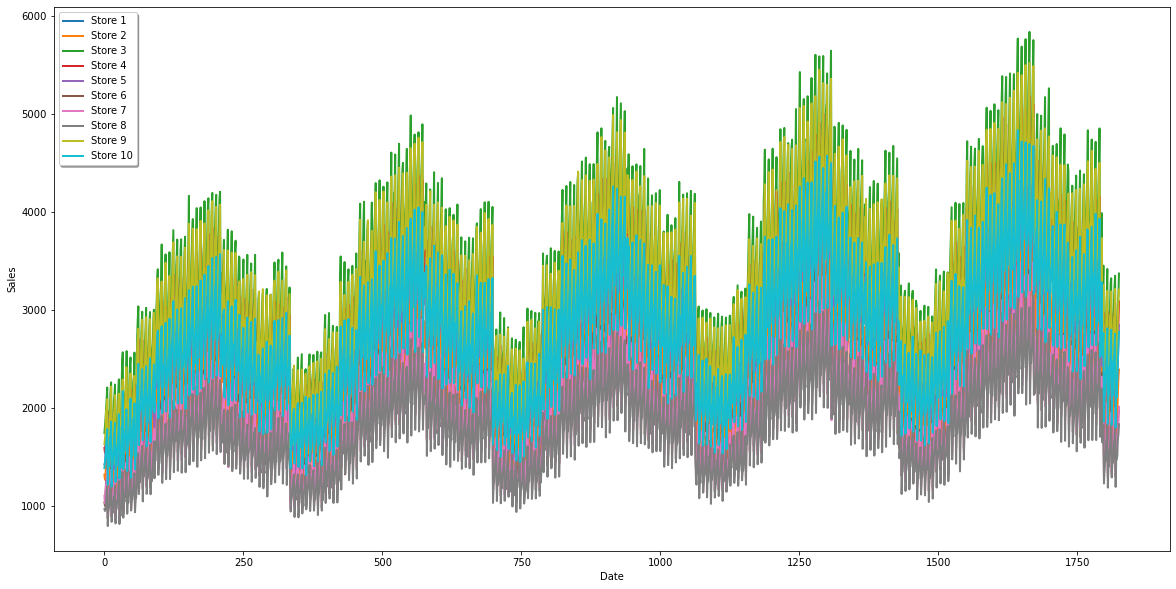

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
legend = []
for i in range(10):
    store_sales=train.loc[train['store'] == i]
    store_sales=store_sales.groupby('date', as_index=False)['sales'].sum()
    store_sales=store_sales.reset_index()['sales']
    plt.plot(store_sales, linewidth=2)    
    legend.append(('Store '+str(i+1)))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(legend, loc='upper left', ncol=1, fancybox=True, shadow=True)
plt.show()

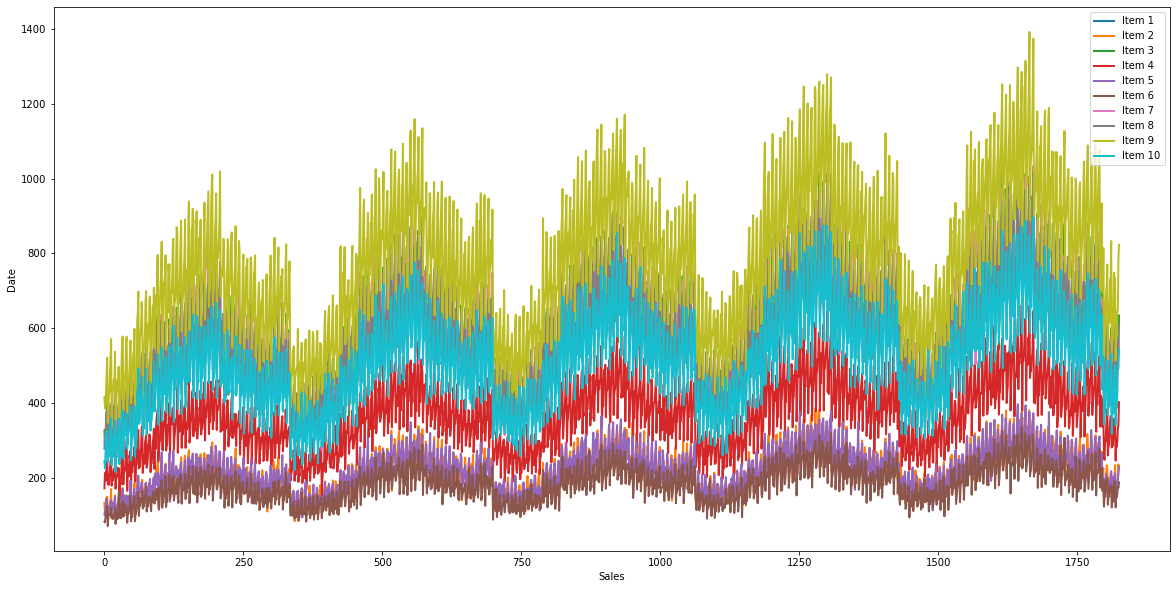

In [15]:
plt.figure(figsize=(20,10))
legend = []
for i in range(10):
    item_sales=train.loc[train['item'] == i]
    item_sales=item_sales.groupby('date', as_index=False)['sales'].sum()
    item_sales=item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=2)    
    legend.append(('Item '+str(i+1)))
plt.xlabel('Sales')
plt.ylabel('Date')
plt.legend(legend, loc='upper right')
plt.show()

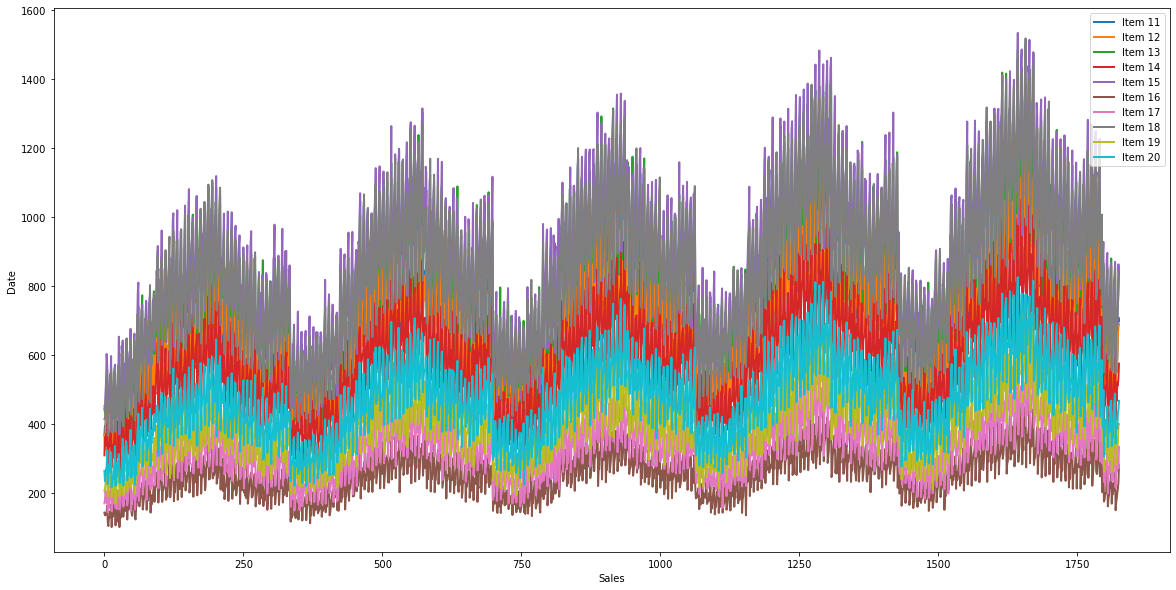

In [16]:
plt.figure(figsize=(20,10))
legend = []
#i=10
for i in range(10):
    item_sales=train.loc[train['item'] == i+11]
    item_sales=item_sales.groupby('date', as_index=False)['sales'].sum()
    item_sales=item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=2)    
    legend.append(('Item '+str(i+11)))
plt.xlabel('Sales')
plt.ylabel('Date')
plt.legend(legend, loc='upper right')
plt.show()

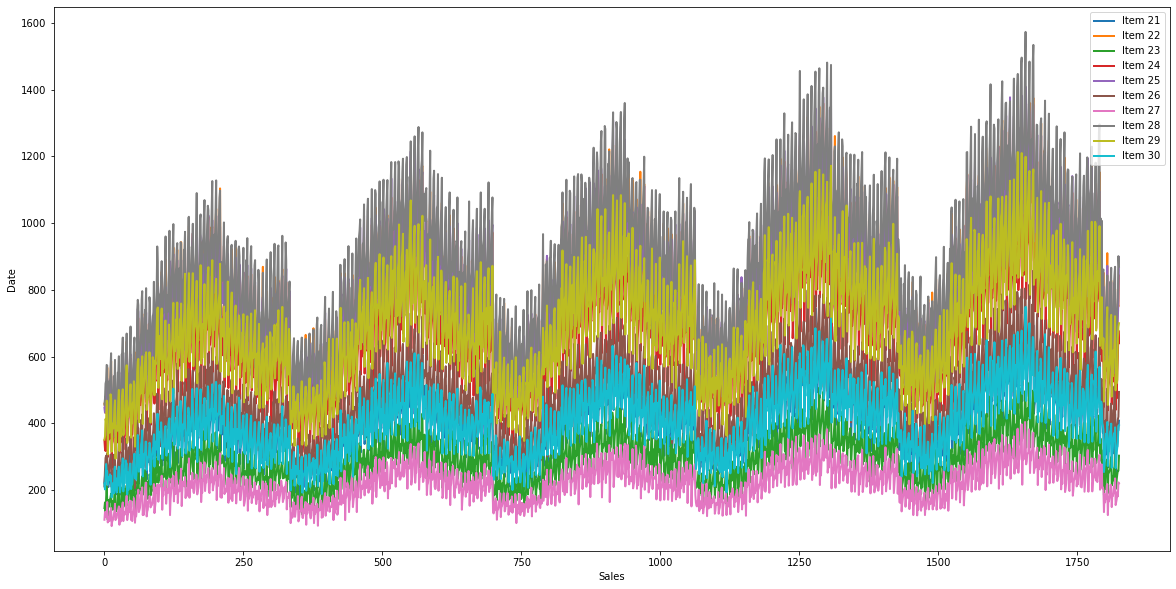

In [17]:
plt.figure(figsize=(20,10))
legend = []
#i=10
for i in range(10):
    item_sales=train.loc[train['item'] == i+21]
    item_sales=item_sales.groupby('date', as_index=False)['sales'].sum()
    item_sales=item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=2)    
    legend.append(('Item '+str(i+21)))
plt.xlabel('Sales')
plt.ylabel('Date')
plt.legend(legend, loc='upper right')
plt.show()

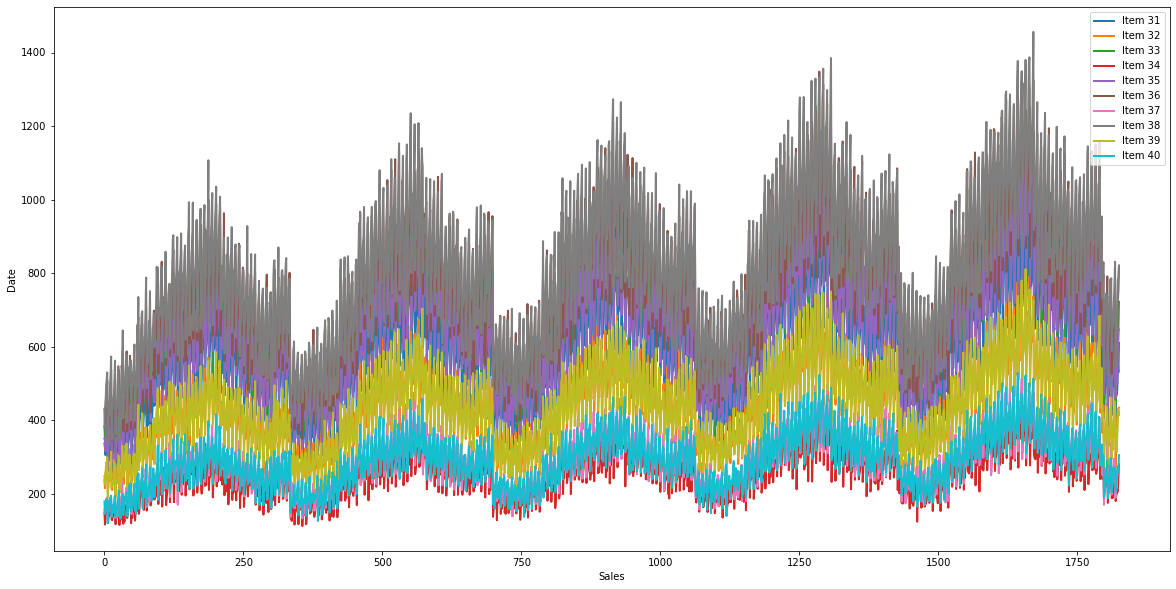

In [18]:
plt.figure(figsize=(20,10))
legend = []
#i=10
for i in range(10):
    item_sales=train.loc[train['item'] == i+31]
    item_sales=item_sales.groupby('date', as_index=False)['sales'].sum()
    item_sales=item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=2)    
    legend.append(('Item '+str(i+31)))
plt.xlabel('Sales')
plt.ylabel('Date')
plt.legend(legend, loc='upper right')
plt.show()

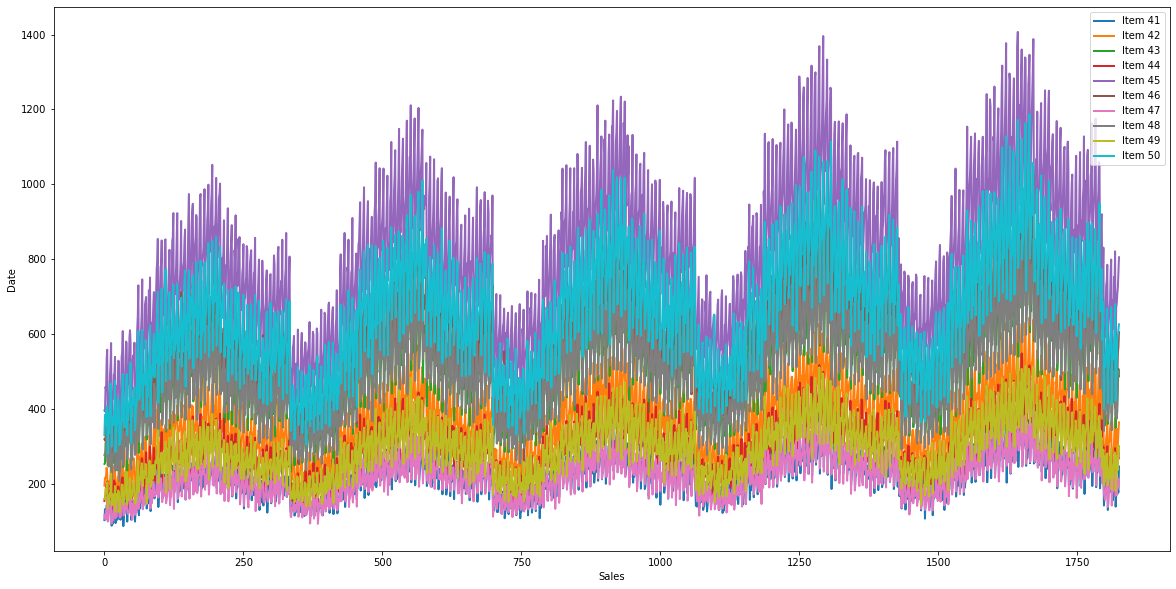

In [19]:
plt.figure(figsize=(20,10))
legend = []
#i=10
for i in range(10):
    item_sales=train.loc[train['item'] == i+41]
    item_sales=item_sales.groupby('date', as_index=False)['sales'].sum()
    item_sales=item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=2)    
    legend.append(('Item '+str(i+41)))
plt.xlabel('Sales')
plt.ylabel('Date')
plt.legend(legend, loc='upper right')
plt.show()